
# Neural network for image classification

- NN을 구축하여 2진분류 이미지 문제 해결하기
  - Approach 1 : extract all the pixels
  - Approach 2 : feature extraction

## Approach 1 : extract all the pixels
- 모든 픽셀을 입력층으로 입력


### importing the libraries

In [1]:
import cv2
import numpy as np
import os
import zipfile
from google.colab.patches import cv_imshow
import tensorflow as tf
import pandas as pd
import seaborn as sns # 데이터 시각화
import matplotlib.pyplot as plt # 그래프 생성
tf.__version__

'2.15.0'

### Extracting pixels from images

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Colab Notebooks/Project/Computer Vision/src/Datasets/homer_bart_1.zip'
zip_object = zipfile.ZipFile(file= path, mode = 'r')
zip_object.extractall('./')
zip_object.close()

In [4]:
directory = '/content/homer_bart_1'
files = [os.path.join(directory, f) for f in sorted(os.listdir(directory))]
print(files)

['/content/homer_bart_1/.DS_Store', '/content/homer_bart_1/bart1.bmp', '/content/homer_bart_1/bart10.bmp', '/content/homer_bart_1/bart100.bmp', '/content/homer_bart_1/bart101.bmp', '/content/homer_bart_1/bart102.bmp', '/content/homer_bart_1/bart103.bmp', '/content/homer_bart_1/bart104.bmp', '/content/homer_bart_1/bart105.bmp', '/content/homer_bart_1/bart106.bmp', '/content/homer_bart_1/bart108.bmp', '/content/homer_bart_1/bart109.bmp', '/content/homer_bart_1/bart11.bmp', '/content/homer_bart_1/bart110.bmp', '/content/homer_bart_1/bart111.bmp', '/content/homer_bart_1/bart112.bmp', '/content/homer_bart_1/bart113.bmp', '/content/homer_bart_1/bart114.bmp', '/content/homer_bart_1/bart115.bmp', '/content/homer_bart_1/bart116.bmp', '/content/homer_bart_1/bart117.bmp', '/content/homer_bart_1/bart118.bmp', '/content/homer_bart_1/bart119.bmp', '/content/homer_bart_1/bart12.bmp', '/content/homer_bart_1/bart120.bmp', '/content/homer_bart_1/bart121.bmp', '/content/homer_bart_1/bart122.bmp', '/conte


### 이미지에서 픽셀 추출

1. 이미지 로드 후 reshape 및 채널 조정(필요에 따라)

2. 불러온 image 파일 신경망에 넣을 수 있도록 백터형태로 type 변경

* 보통 image 파일은 행 * 열의 형태로 나타난다. 하지만 입력층에서는 한픽셀당 한개의 입력층으로 입력이 들어간다. 따라서 행 * 열 형태를 1차원의 형태로 바꿔줘야한다.

3. 각각의 이미지를 배열에 한 묶음으로 저장(라벨도 저장)

In [ ]:
# 기본 이미지를 그대로 사용하기엔 시간이 오래걸리므로 (128,128)크기로 축소
height,width = 128, 128
images = []
classes = []

In [ ]:
for image_path in files:
  try:
    image = cv2.imread(image_path)
    # 읽어드린 형태의 이미지는 (행, 컬럼, 채널)의 형태이다. 채널은 필요없으니 행과 열만 사용하도록 바꾼다.
    (H,W) = image.shape[:2]
  # 읽을 수 없는 파일 무시
  except:
    continue
  # 이미지 크기 재조정 후 흑백 사진으로 변환
  image = cv2.resize(image, (width,height))
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # ravel()함수는 2차원으로 되어있는 이미지를 백터의 형태로 바꿔준다
  # 다시 이미지형태로 바꾸고싶으면 image.reshape(width,height) 하자
  image = image.ravel()
  print(image.shape)

  images.append(image)

  # normpath함수는 path에서 . / .. 과 같은 구분자를 제거하여 정규화시킴
  # basename은 파일경로를 제외하고 파일이름만 출력
  image_name = os.path.basename(os.path.normpath(image_path))
  if image_name.startswith('b'):
    class_name = 0
  else:
    class_name = 1

  classes.append(class_name)

  print(class_name)

(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0

In [ ]:
# type이 list라 NN에 입력 불가
# np.asarray로 타입변경 필요
type(images), type(classes)

(list, list)

In [ ]:
x= np.asarray(images)
y = np.asarray(classes)
print(type(x),type(y))
y

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

<Axes: ylabel='count'>

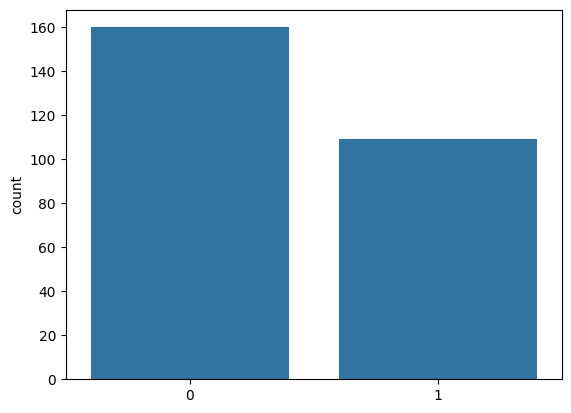

In [ ]:
sns.countplot(x=y)

In [ ]:
np.unique(y, return_counts=True)

(array([0, 1]), array([160, 109]))

### 데이터 정규화(data Normalizing the data)

- 기존 픽셀의 값(0 - 255)를 그대로 NN에 입력하면 값이 크기때문에 학습시간이 오래걸리고 각각의 데이터의 크기의 편차가 너무 커서 효과적인 학습이 불가능하다. 따라서 0~1까지로 값을을 mapping하여 효과적으로 NN이 학습 될 수 있도록 하자.

In [ ]:
x[0].max(), x[0].min()

(255, 0)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 데이터 min, max 크기를 변환해주는 객체
scaler = MinMaxScaler()
# 데이터 정규화 함수
x = scaler.fit_transform(x)

### 학습셋과 검증셋 분할( Train and test set )
- 학습 모델을 검증하기 위해선 학습에 사용하지 않은 데이터를 이용하여 테스트하여 객관적인 테스트가 가능하다. 따라서 데이터를 학습 데이터와 테스트 데이터로 분할하는것은 필요하다.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:

# train_test_split(input, label, option)
# option중 test_size는 test데이터의 비율을 설정한다. ex)0.2면 전체 데이터중 20%를 테스트 데이터로 사용한다
# option 중 random_state는 무작위로 데이터를 나눌때 시드값을 지정하여 언제 어디서 사용하든 random state와 dataset만 같다면 동일한 무작위 결과를 얻을 수 있도록 해준다.
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=1)

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape,y_test.shape)

(215, 16384) (215,)
(54, 16384) (54,)


### 신경망 구축 및 학습

In [ ]:
# 순방향 NN 생성 (16384 -> 8193 -> 8193 ->1)
network1 = tf.keras.models.Sequential()
# tf.keras.layers.Dense는 신경망에 한층의 뉴런디 다음층의 뉴련과 연결되는 신경망이다.
# input_shape는 입력층의 개수로 입력할 pixel 개수를 적어야한다.
# unit은 은닉층의 개수로 기본 은닉층 개수 구하는 공식인 입력층+출력층/2= 8193이다.
network1.add(tf.keras.layers.Dense(input_shape=(16384,), units=8193, activation = 'relu'))
# 두번째 은닉층
network1.add(tf.keras.layers.Dense(units=8193, activation='relu'))
# 출력층 ( 2진분류 문제니깐 sigmoid함수를 통해 한개의 출력층으로 변환
network1.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

In [ ]:
network1.summary() # NN 상세보기

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8193)              134242305 
                                                                 
 dense_1 (Dense)             (None, 8193)              67133442  
                                                                 
 dense_2 (Dense)             (None, 1)                 8194      
                                                                 
Total params: 201383941 (768.22 MB)
Trainable params: 201383941 (768.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 네트워크 컴파일 방법 설정 ( Adam 경사하강법, binary_crossentropy 손실함수, accuracy로 정확도 확인 )
network1.compile(optimizer='Adam',loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# train 데이터로만 학습시작 (학습한걸로 검증하기 때문에 모델 검증이 애매하다)
history = network1.fit(x_train, y_train, epochs=50)

Epoch 1/50
7/7 [==============================] - 45s 6s/step - loss: 125.1178 - accuracy: 0.4791
Epoch 2/50
7/7 [==============================] - 30s 4s/step - loss: 8.5132 - accuracy: 0.5209
Epoch 3/50
7/7 [==============================] - 27s 4s/step - loss: 4.6555 - accuracy: 0.5116
Epoch 4/50
7/7 [==============================] - 28s 4s/step - loss: 1.8040 - accuracy: 0.5674
Epoch 5/50
7/7 [==============================] - 27s 4s/step - loss: 0.7533 - accuracy: 0.5023
Epoch 6/50
7/7 [==============================] - 27s 4s/step - loss: 0.6659 - accuracy: 0.6279
Epoch 7/50
7/7 [==============================] - 35s 5s/step - loss: 0.6370 - accuracy: 0.6744
Epoch 8/50
7/7 [==============================] - 32s 5s/step - loss: 0.6264 - accuracy: 0.6512
Epoch 9/50
7/7 [==============================] - 27s 4s/step - loss: 0.6856 - accuracy: 0.5628
Epoch 10/50
7/7 [==============================] - 27s 4s/step - loss: 0.6369 - accuracy: 0.6140
Epoch 11/50
7/7 [====================

In [ ]:
# train 후 반환 된 history로 에포크 실행될때마다 생성된 여러가지 정보를 볼 수 있다.
# keys()는 history.history['키']의 키 값을 반환해준다
history.history.keys()

dict_keys(['loss', 'accuracy'])

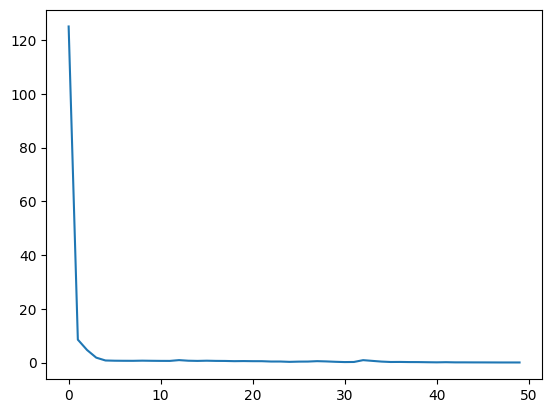

In [ ]:
# loss 값을 그래프로 시각화
plt.plot(history.history['loss']);

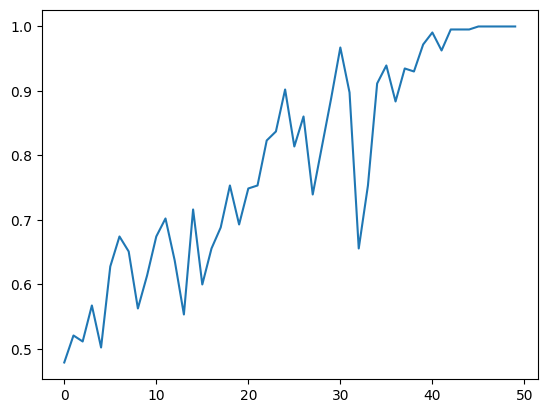

In [ ]:
# accuracy 값을 그래프로 시각화
plt.plot(history.history['accuracy']);

### 신경망 평가하기
- train 데이터로 학습한 신경망을 처음보는 test 데이터를 활용하여 정확도를 검증한다.

In [ ]:
# network1.predict(test)를 하면 test dataset에 대한 신경망 모델을 활용한 예측값을 배열로 반환
predictions = network1.predict(x_test)
predictions

2/2 [==============================] - 1s 339ms/step


array([[0.01397153],
       [0.99851334],
       [0.03557898],
       [0.14690237],
       [0.7071793 ],
       [0.02617744],
       [0.99804425],
       [0.8895812 ],
       [0.57379043],
       [0.9650666 ],
       [0.09927037],
       [0.9999857 ],
       [0.87903607],
       [0.7823722 ],
       [0.10608333],
       [0.01788791],
       [0.19889219],
       [0.9037397 ],
       [0.13492031],
       [0.0104146 ],
       [0.00547725],
       [0.790022  ],
       [0.04550089],
       [0.17609452],
       [0.07940151],
       [0.9163875 ],
       [0.01360221],
       [0.01921   ],
       [0.11292424],
       [0.9853362 ],
       [0.40820903],
       [0.9992791 ],
       [0.9269547 ],
       [0.00105786],
       [0.9999156 ],
       [0.01753686],
       [0.7146073 ],
       [0.03167586],
       [0.25471327],
       [0.01196568],
       [0.9856046 ],
       [0.96794873],
       [0.17868009],
       [0.04966376],
       [0.02163726],
       [0.5487605 ],
       [0.9885518 ],
       [0.054

In [ ]:
# 1 = Treu - hommer
# 0 = False - bart
predictions = (predictions > 0.5)
predictions

array([[False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True]])

In [ ]:
from sklearn.metrics import accuracy_score
# 예측값과 정답값을 비교하여 정확도를 나타내기(모델 평가)
accuracy_score(y_test, predictions)

0.7222222222222222

In [ ]:
from sklearn.metrics import confusion_matrix
# confusion_matrix 그리기
cm = confusion_matrix(y_test, predictions)
cm

array([[21,  7],
       [ 8, 18]])

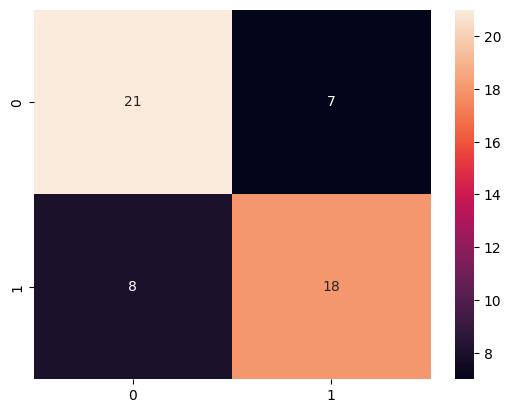

In [ ]:
sns.heatmap(cm, annot=True);

In [ ]:
from sklearn.metrics import classification_report
# precision, recall(재현률), f1-score(F1점수) 등등을 계산해준다
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.75      0.74        28
           1       0.72      0.69      0.71        26

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.72      0.72      0.72        54



### 신경망 저장 및 로드
- 학습하는데 오랜시간이 걸린다. 우리는 모델을 사용하기에 매번 학습을 할 수 없을 뿐더러 제 3자에게 모델을 사용할 수 있도록 할려면 이미 학습된 모델을 그대로 전달하는게 효과적일 것 이다. 따라서 신경망의 가중치와 정보를 파일로 저장하여 관리하자.

##### 저장

In [ ]:
# 신경망 구조 저장(뉴런의 개수, 구조)
model_json = network1.to_json()
with open('network1.json','w') as json_file:
  json_file.write(model_json)

In [ ]:
# 신경망에 학습된 가중치를 파일로 저장
from keras.models import save_model
network1_saved = save_model(network1, 'weights1.hdf5')

<ipython-input-30-73ae6e92d836>:3: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  network1_saved = save_model(network1, 'weights1.hdf5')


##### 불러오기

In [ ]:
# 신경망 구조 불러오기
with open('network1.json') as json_file: # 읽기모드
  json_saved_model = json_file.read()
json_saved_model

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_input_shape": [null, 16384], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 16384], "units": 8193, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}, "registered_name": null, "build_config": {"input_shape": [null, 16384]}}, {"module": "keras.layers", "class_name": "Dense

In [ ]:
# 신경망 가중치 불러오기

# json파일을 신경망 구조로 변환
network1_loaded = tf.keras.models.model_from_json(json_saved_model)

network1_loaded.load_weights('/content/weights1.hdf5')
# 예측에 사용하기위해 loss 함수 지정
network1_loaded.compile(optimizer='Adam',loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
network1_loaded.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8193)              134242305 
                                                                 
 dense_1 (Dense)             (None, 8193)              67133442  
                                                                 
 dense_2 (Dense)             (None, 1)                 8194      
                                                                 
Total params: 201383941 (768.22 MB)
Trainable params: 201383941 (768.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# network1_loaded.predict(x_test[0])은 에러가나고 [0:1]은 에러가 안난다
# 그 이유는 [0]은 특징들이 그냥 배열에 담아서 전달되고 [0:1]은 (0, 특징) 이런식으로 2차원으로 전달되기때문이다.
predictions = network1_loaded.predict(x_test[0:1])
predictions

### 하나의 단일 이미지만 예측하기

In [ ]:

# 검증 데이터에서 하나의 이미지를 가져온다
# 현재 백터의 형식으로 이미지가 표현되어 이미지형태인 행렬로 바꿔줘야한다.
test_image = x_test[0]
# 현재 데이터를 정규화하여 reshape을 한다고해도 실제 데이터값이 아닌 1,0으로 이루어져 이미지가 출력이안된다.
#test_image.reshape(width,height)
# 정규화 데이터를 반대로 돌려놓는 방법 ( reshape(1,-1)을 해줘야한다.
test_image = scaler.inverse_transform(test_image.reshape(1,-1))
# 백터 형식의 이미지를 행렬형태로 전환
cv2_imshow(test_image.reshape(width,height))

In [ ]:
prediction = network1_loaded.predict(test_image)[0][0]
if prediction <0.5:
  print('Bart')
else:
  print('Hommer')

## Approach 2 : feature extraction
- 이미지에서 개발자가 특징을 추출한 그 특징을 활용하여 분류기 학습(예. 색상)# 새 섹션

### Feature extractor (특징 추출)

데이터의 특징을 추출하기 위해선 사용할 데이터를 분석하여 개발자각 직접 특징을 추출해야한다.

본 예제에서 사용한 데이터는 hommer과 bart의 이미지로 각각의 캐릭터에는 캐릭터만의 색상(의류)의 특징이 있다.

따라서 이미지에서 추출할 수 있는 입, 바지, 신발, 티셔츠, 반바지, 스니컬즈의 색상들을 특징으로 잡고 학습을 시키자
* 검은색과 흰색등 단 각각의 클래스가 가지고 있는 유니크한 특징이 아닌 색(둘다 가지고 있는 특징)은 특징으로 설정하지 않는것이 좋다.
* 이미지의 높이를 파악하여 허리위의 색(입, 겉옷 등) 허리 아래의 색(바지, 신발 등)을 구분하여 학습시킬수도있다

In [5]:
files = [os.path.join(directory, f) for f in sorted(os. listdir(directory))]
print(files)

['/content/homer_bart_1/.DS_Store', '/content/homer_bart_1/bart1.bmp', '/content/homer_bart_1/bart10.bmp', '/content/homer_bart_1/bart100.bmp', '/content/homer_bart_1/bart101.bmp', '/content/homer_bart_1/bart102.bmp', '/content/homer_bart_1/bart103.bmp', '/content/homer_bart_1/bart104.bmp', '/content/homer_bart_1/bart105.bmp', '/content/homer_bart_1/bart106.bmp', '/content/homer_bart_1/bart108.bmp', '/content/homer_bart_1/bart109.bmp', '/content/homer_bart_1/bart11.bmp', '/content/homer_bart_1/bart110.bmp', '/content/homer_bart_1/bart111.bmp', '/content/homer_bart_1/bart112.bmp', '/content/homer_bart_1/bart113.bmp', '/content/homer_bart_1/bart114.bmp', '/content/homer_bart_1/bart115.bmp', '/content/homer_bart_1/bart116.bmp', '/content/homer_bart_1/bart117.bmp', '/content/homer_bart_1/bart118.bmp', '/content/homer_bart_1/bart119.bmp', '/content/homer_bart_1/bart12.bmp', '/content/homer_bart_1/bart120.bmp', '/content/homer_bart_1/bart121.bmp', '/content/homer_bart_1/bart122.bmp', '/conte

In [6]:
export = 'mouth,pants,shoes,tshirt,shorts,sneakers,class \n'

In [7]:
show_images = True
features=[]

In [12]:
for image_path in files:
  try:
    original_image = cv2.imread(image_path)
    (H,W) = original_image.shape[:2]
  except:
    continue

  image = original_image.copy()
  image_features = []
  mouth = pants = shoes = 0 # hommer의 특징
  tshirt = shorts = sneakers =0 # bart의 특징

  image_name = os.path.basename(os.path.normpath(image_path))

  if image_name.startswith('b'):
    class_name = 0
  else:
    class_name = 1

  # 각각의 데이터 이미지들의 높이, 너비가 다르다.
  for height in range(0,H):
    for width in range(0,W):
      # image.item(행번호, 열번호, 추출할 색상)
      # 추출할 색상은 RGB반대로 0=B, 1=G, 2=R 이다.
      blue = image.item(height, width, 0) # 이미지[height, width]의 첫번째 색상의 값(blue) 추출
      green = image.item(height, width, 1)
      red = image.item(height, width, 2)

      # Hommer - brown mouth
      # 각각의 색상을 범위형으로하는 이유는 데이터 이미지들의 색이 다 똑같은게 아니라 조금 식 다르기때문이다.
      if (blue >= 95 and blue <= 140 and green >= 160 and green <= 185 and red >=175 and red<=200):
        image[height,width] = [0,255,255]#BGR
        mouth += 1
      # Hommer - brown mouth
      # 각각의 색상을 범위형으로하는 이유는 데이터 이미지들의 색이 다 똑같은게 아니라 조금 식 다르기때문이다.
      if (blue >= 150 and blue <= 180 and green >= 98 and green <= 120 and red >=0 and red<=90):
        image[height,width] = [0,255,255]#BGR
        pants += 1
      # Hommer - gray shoes
      # 신발은 보통 이미지의 하단부분에 있다. 따라서 이미지의 하단부분의 픽셀만 검사 해도 된다.
      if height > (H/2):
        if (blue >= 25 and blue <= 45 and green >= 25 and green <= 45 and red >=25 and red<=45):
          image[height,width] = [0,255,255]#BGR
          shoes += 1
      # Bart - orange t-shirt
      # 각각의 색상을 범위형으로하는 이유는 데이터 이미지들의 색이 다 똑같은게 아니라 조금 식 다르기때문이다.
      if (blue >= 11 and blue <= 22 and green >= 85 and green <= 105 and red >=240 and red<=225):
        image[height,width] = [0,255,128]#BGR
        tshirt += 1
      # Bart - blue shorts
      # 각각의 색상을 범위형으로하는 이유는 데이터 이미지들의 색이 다 똑같은게 아니라 조금 식 다르기때문이다.
      if (blue >= 125 and blue <= 170 and green >= 0 and green <= 12 and red >=0 and red<=20):
        image[height,width] = [0,255,128]#BGR
        shorts += 1
      # Bart - blue sneakers
      # 각각의 색상을 범위형으로하는 이유는 데이터 이미지들의 색이 다 똑같은게 아니라 조금 식 다르기때문이다.
      # 신발은 보통 이미지의 하단부분에 있다. 따라서 이미지의 하단부분의 픽셀만 검사 해도 된다.
      if height > (H/2):
        if (blue >= 125 and blue <= 170 and green >= 0 and green <= 12 and red >=0 and red<=20):
          image[height,width] = [0,255,128]#BGR
          sneakers += 1

  # 각각의 데이터 이미자의 W,H의 크기가 다르기 때문에 특성의 수를 전체 픽셀의 백분률로 나타낸다
  mouth = round((mouth /(H * W)) * 100,9)
  pants = round((pants /(H * W)) * 100,9)
  shoes = round((shoes /(H * W)) * 100,9)


  tshirt = round((tshirt /(H * W)) * 100,9)
  shorts = round((shorts /(H * W)) * 100,9)
  sneakers = round((sneakers /(H * W)) * 100,9)

  image_features.append(mouth)
  image_features.append(pants)
  image_features.append(shoes)
  image_features.append(tshirt)
  image_features.append(shorts)
  image_features.append(sneakers)

  features.append(image_features)

  print('Homer mouth: %s - Homer pants: %s - Homer shoes:%s' % (image_features[0], image_features[1], image_features[2]))
  print('Bart t-shirt: %s - Bart shorts: %s - Bart sneakers:%s' % (image_features[3],image_features[4],image_features[5]))

  if show_images == True:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    fi, im = plt.subplots(1,2)
    im[0].axis('off')
    im[0].imshow(original_image)
    im[1].axis('off')
    im[1].imshow(image)
    plt.show()

Output hidden; open in https://colab.research.google.com to view.